### Estudiantes: Ernesto Herrera García & Antonio Fabián Linares Brito

# Ejercicio 1

In [1]:
#1.1
import math

def expanded_form(pol, grade):
    output = []
    for k in range(grade+1):
        output.append(math.comb(grade, k) * pol[0]**(grade-k) * pol[1]**k)
    return output
pol = expanded_form([1, -1], 5)
print(pol)

[1, -5, 10, -10, 5, -1]


In [2]:
#1.2
import numpy as np

def evaluar_pol(lista_de_coeficientes: list, x: int):
    pol = np.array(lista_de_coeficientes, dtype = np.float64)
    temp = 0
    for j in range(len(pol)):
        temp += x**(len(pol)-j-1) * pol[j]
    return temp

numeros = list(np.linspace(0.9986, 1.0014, 200))
x = numeros.copy()
prec = np.finfo(float).eps

for k in range(len(numeros)):
    numeros[k] = evaluar_pol(pol, numeros[k]) / prec

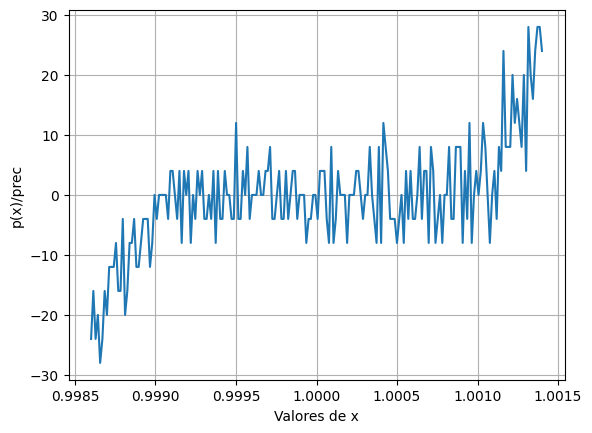

In [3]:
#1.3
import matplotlib.pyplot as plt

plt.plot(x, numeros)
plt.xlabel("Valores de x")
plt.ylabel("p(x)/prec")
#plt.xlim(0.9985, 1.0015)
plt.grid()

In [6]:
# 1.4
import numpy as np

eps_m = np.finfo(float).eps
# Cálculo del intervalo de incertidumbre
delta = eps_m ** (1/5)
x_min = 1 - delta
x_max = 1 + delta

print(f"Intervalo de incertidumbre para la raíz x = 1: [{x_min:.5f}, {x_max:.5f}]")

Intervalo de incertidumbre para la raíz x = 1: [0.99926, 1.00074]


# Ejercicio 2

In [7]:
#2.1
pol = [3,0,1,-1]
intervalo = [0,1]

def derivada(pol):
    output = []
    for k in range(0,len(pol)-1):
        output.append(pol[k]*(len(pol)-1))
    return output
        
print(f"Limite superior : {evaluar_pol(pol,intervalo[1])}")
print(f"Limite inferior: {evaluar_pol(pol,intervalo[0])}")
print(f"La funcion:{derivada(pol)} es una parabola con vertice en (0,3) y abre hacia arriba por lo que no tiene ceros")
print(f"Por lo q si la evaluamos en 0, nos da 3, un termino positivo, lo que nos indica que f(x) es creciente en todo su dominio")
print(f"Como la funcion es monotona creciente, y pasa de un valor negativo a uno positivo, por el teorema de un colega ahi se puede decir q hay un cero de la funcion")


Limite superior : 3.0
Limite inferior: -1.0
La funcion:[9, 0, 3] es una parabola con vertice en (0,3) y abre hacia arriba por lo que no tiene ceros
Por lo q si la evaluamos en 0, nos da 3, un termino positivo, lo que nos indica que f(x) es creciente en todo su dominio
Como la funcion es monotona creciente, y pasa de un valor negativo a uno positivo, por el teorema de un colega ahi se puede decir q hay un cero de la funcion


In [8]:
#2.2
def n_Bisecciones(n, pol, intervalo):
    fa = evaluar_pol(pol, intervalo[0])
    fb = evaluar_pol(pol, intervalo[1])
    middle = (intervalo[0] + intervalo[1])/2
    tol = 1e-6
    fc = evaluar_pol(pol, middle)
    
    if n == 0:
        return middle
    if abs(fc) < tol:
        return print(f"Se llego a {middle} en {n} iteraciones")
    
    if fa * fc < 0:
        return n_Bisecciones(n-1, pol,[intervalo[0], middle])
    
    if fb * fc < 0:
        return n_Bisecciones(n-1, pol, [middle, intervalo[1]])
    
print(n_Bisecciones(3, pol, intervalo))

0.5625


In [9]:
#2.3
k = 0
while True:
    error_Biseccion = (intervalo[1] - intervalo[0])/2**k
    if error_Biseccion <= 1e-6:
        print(k)
        break
    k+=1

20


In [11]:
#2.4
def Newton_Raphson(fx, df, ini, tol = 1e-6, max_it = 100):
    for _ in range(max_it):
        xn = ini - (fx(ini)/df(ini))
        if abs(xn -ini) < tol:
            return xn
        if abs(fx(xn)) < tol:
            return xn
        ini = xn
print(Newton_Raphson(lambda x: x**3 + x -1, lambda x: 3*x**2 + 1, 0.5))

0.6823278038283471


In [28]:
#2.5
import numpy as np

def f(x):
    return x**3 + x - 1

def df(x):
    return 3*x**2 + 1

def newton_method(x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / df(x)
        if abs(x_new - x) < tol:
            return x_new, i + 1
        x = x_new
    return x, max_iter

x0 = float(1)

root, iterations = newton_method(x0)

print(f"Solución aproximada: {root:.8f}")
print(f"Número de iteraciones: {iterations}")

Solución aproximada: 0.68232780
Número de iteraciones: 5


In [31]:
#2.6
import numpy as np

def newton_method(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    iterations = []
    for _ in range(max_iter):
        x_new = x - f(x) / df(x)
        iterations.append(x_new)
        if abs(x_new - x) < tol:
            break
        x = x_new
    return x, iterations

x_star, iterations = newton_method(f, df, x0)
print(f"Solución aproximada x*: {x_star:.6f}")

if len(iterations) >= 3:
    x_k = iterations[-2]
    x_k1 = iterations[-1]
    denominator = (x_k - x_star)**2

    if abs(denominator) < 1e-12:
        print("El denominador es demasiado pequeño, no se puede calcular el límite.")
    else:
        limite = (x_k1 - x_star) / denominator
        theoretical_limit = (3 * x_star) / (3 * x_star**2 + 1)
        print(f"Límite calculado: {limite:.6f}")
        print(f"Límite teórico: {theoretical_limit:.6f}")

Solución aproximada x*: 0.682328
El denominador es demasiado pequeño, no se puede calcular el límite.


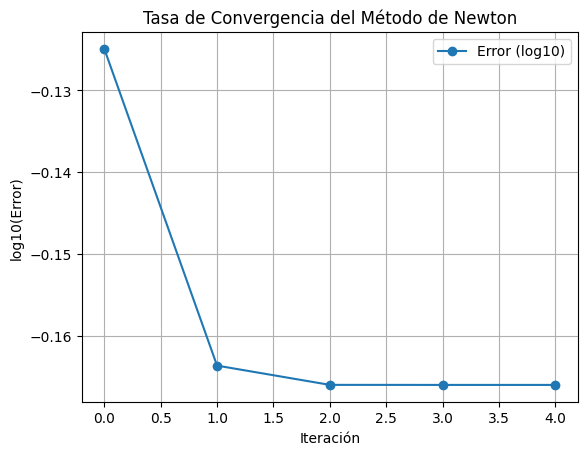

El gráfico muestra una reducción rápida del error, típica de la convergencia cuadrática.


In [32]:
#2.7
import numpy as np
import matplotlib.pyplot as plt

x_star, errors = newton_method(f, df, x0)

# Gráfico del error vs. iteraciones
plt.plot(range(len(errors)), np.log10(errors), 'o-', label='Error (log10)')
plt.xlabel('Iteración')
plt.ylabel('log10(Error)')
plt.title('Tasa de Convergencia del Método de Newton')
plt.legend()
plt.grid()
plt.show()

print("El gráfico muestra una reducción rápida del error, típica de la convergencia cuadrática.")

# Ejercicio 3

In [33]:
# En ciencia de datos, es común ajustar modelos predictivos (como regresiones) donde necesitamos encontrar el punto de equilibrio
# en una función de costos y beneficios. Por ejemplo, determinar el número mínimo de ventas requeridas para que un proyecto sea rentable.
import math

a, b, c = -0.5, 50, -200

discriminante = b**2 - 4*a*c
x1 = (-b + math.sqrt(discriminante)) / (2*a)
x2 = (-b - math.sqrt(discriminante)) / (2*a)

print(f"Raíces: x1 = {x1:.1f}, x2 = {x2:.1f}")

Raíces: x1 = 4.2, x2 = 95.8
